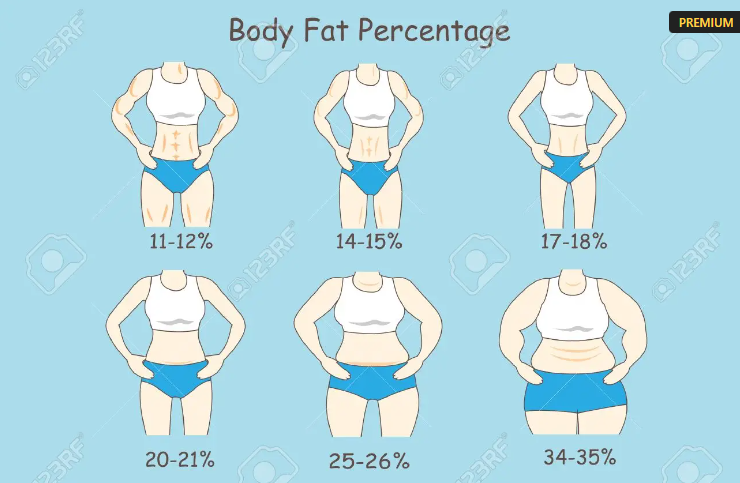

# Context

The data here provides insight on the body measurements and body fat percentage for 252 men. The aim of this study it develop a model to estimate the measurement of body fat percentage using body measurements. To test individuals for their body fat percentage can be extremely costly.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

In [4]:
df = pd.read_csv('bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# Lets understand our data
We have the following columns:
- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm




In [5]:
df.shape

(252, 15)

In [6]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [8]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
#no duplicates in our data
df.duplicated().sum()

0

# Exploratory Data Analysis

Text(0.5, 0.98, 'Visualizing Our Data')

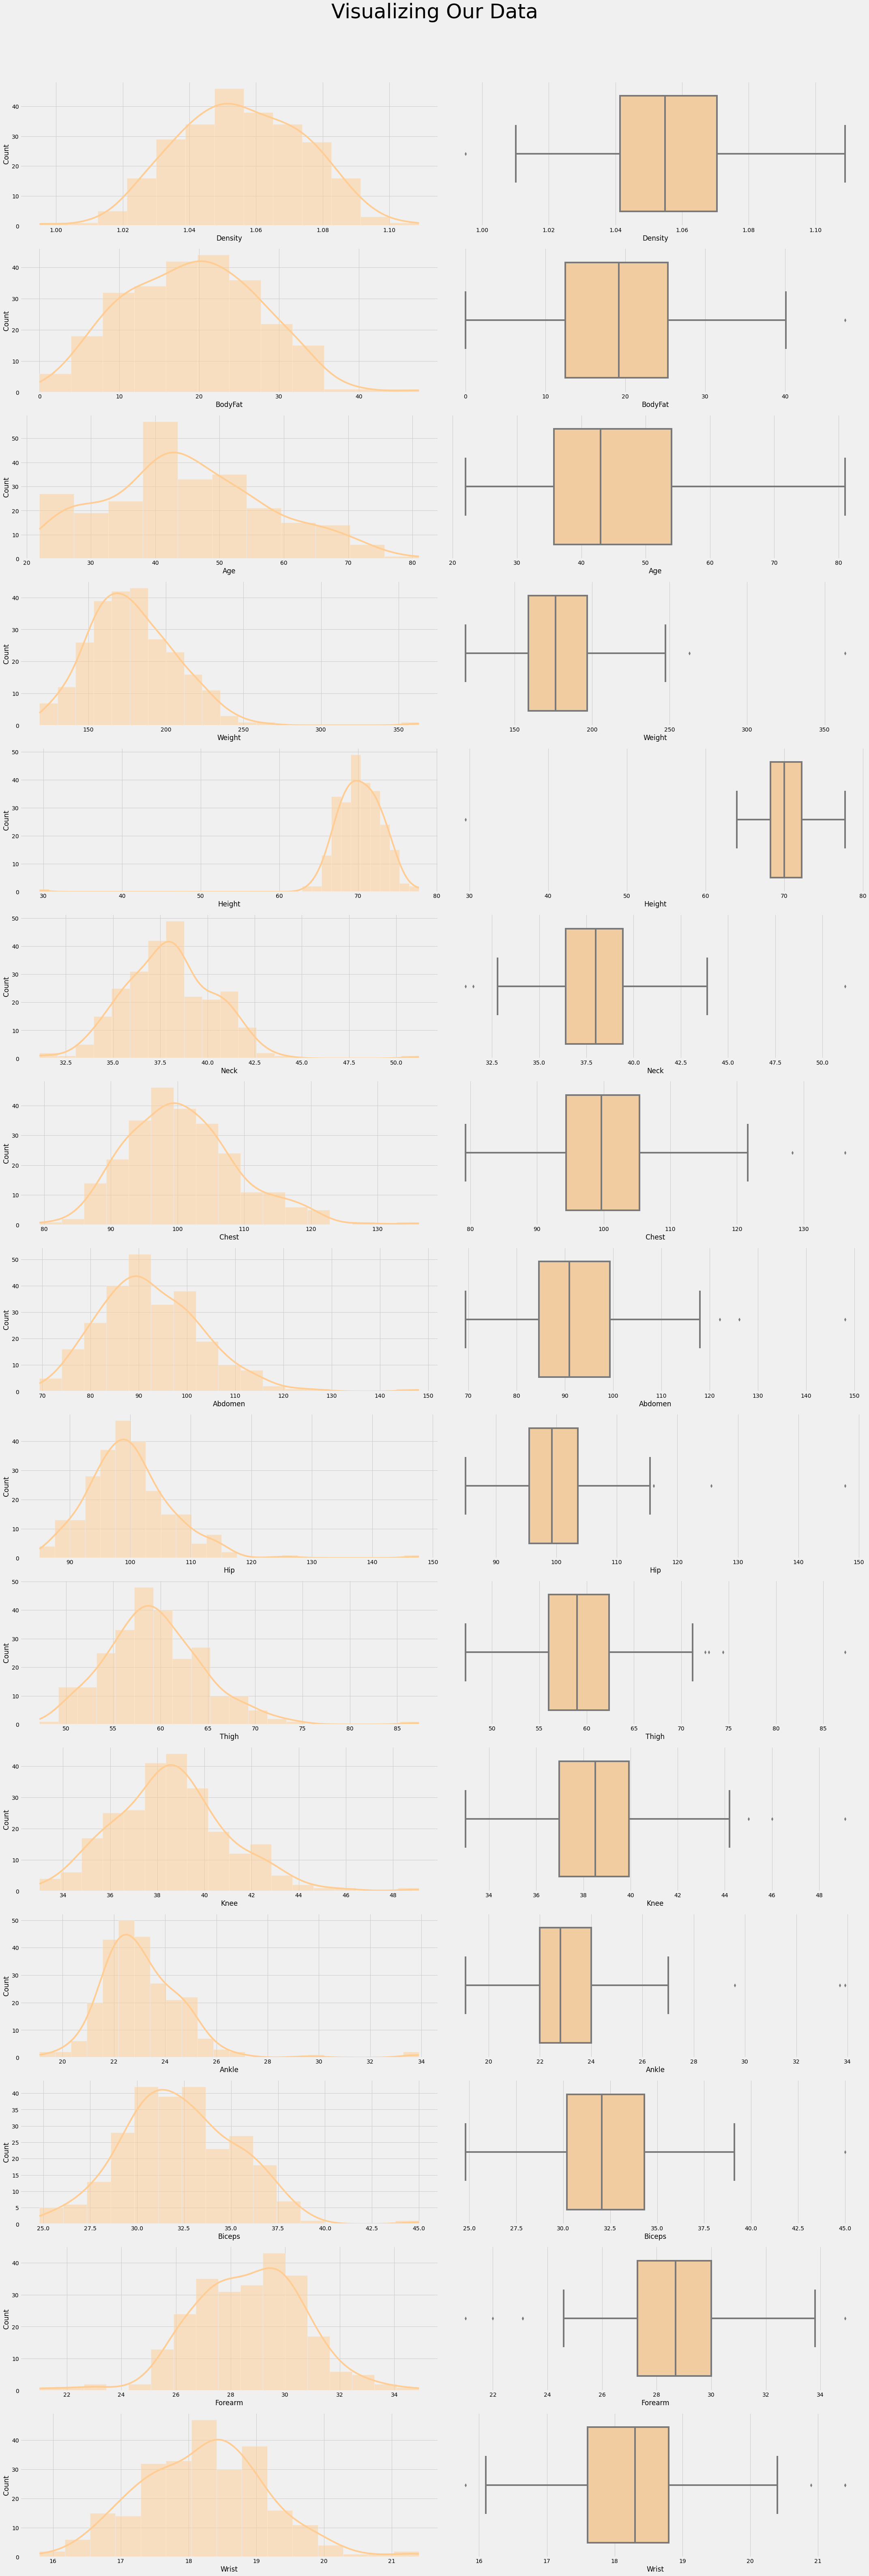

In [10]:
import warnings
import statsmodels.api as sm


warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,2,figsize=(30,90))
for i in enumerate(df.columns):
    sns.histplot(df[i[1]],ax=ax[i[0],0], kde=True)
    sns.boxplot(df[i[1]],ax=ax[i[0],1])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Our Data",fontsize=50)

In [11]:
# Checking Skewness
df.skew(axis=0).sort_values()

Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64

### Important Notes on Skewness:
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [12]:
#Checking to see highly skewed data
dfskew = df.skew(axis=0).sort_values().reset_index().rename(columns={'index':'Column', 0:'Skewness'})
dfskew[(dfskew['Skewness'] < -1) | (dfskew['Skewness'] > 1)]
# We can see areas height, weight, hip, and ankle are all heavily skewed

,Column,Skewness
0,Height,-5.384987
12,Weight,1.205263
13,Hip,1.497127
14,Ankle,2.255134


<AxesSubplot:>

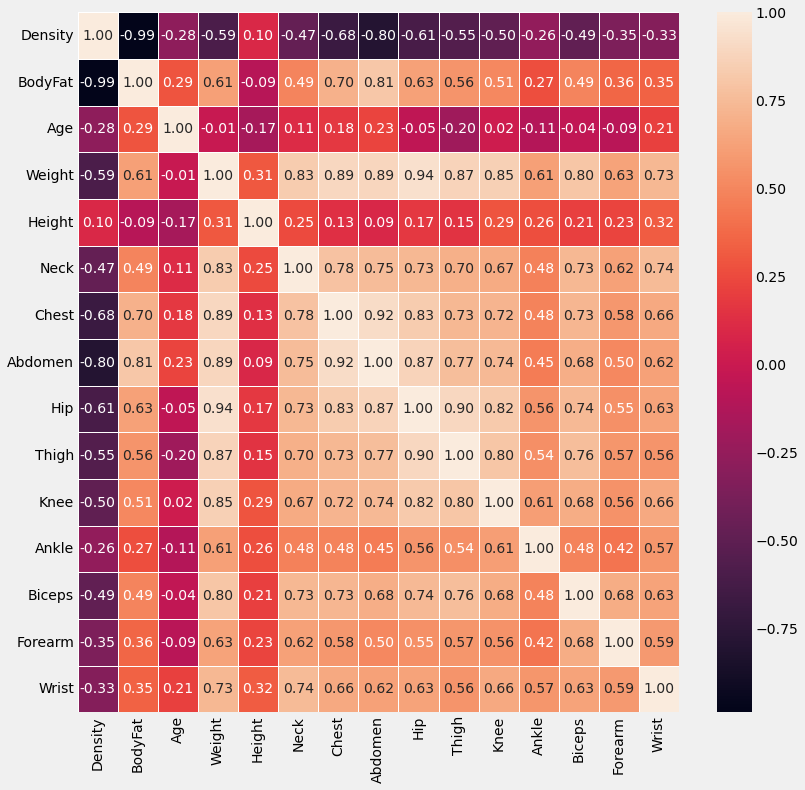

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, fmt="0.2f")
#Scale of heatmap:
# 1 means positively correlated
# -1 means inversely correlated

#### Results:

The correlation matrix above is consisent with normal body fat distribution. For ex, bodyfat and abdomen have a 0.8 correlation. This makes sense because as abdomen circumference increases, you have a higher bodyfat and people generally tend to get fat on their abdomen first. 

In [16]:
X = df.drop(['BodyFat','Density'], axis=1)
y = df['Density']

In [17]:
X['Bmi'] = 703*X['Weight']/(X['Height']**2)
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [21]:
#Abdomen to Chest Ratio
X['ACratio'] = X['Abdomen']/X['Chest']
#Hip to Thigh Ratio
X['HTratio'] = X['Hip']/X['Thigh']

X.drop(['Weight','Height', 'Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342
...,...,...,...,...,...,...,...,...,...,...
247,70,34.9,34.8,21.5,25.6,25.7,18.5,21.024226,0.937220,1.790323
248,72,40.9,40.8,23.2,35.2,28.6,20.1,29.044437,0.967742,1.753356
249,72,38.9,37.3,21.5,31.3,27.2,18.0,30.138946,1.003600,1.686567
250,72,38.9,41.6,22.7,30.5,29.4,19.8,26.979981,0.935365,1.746429


In [22]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
X_clean.shape

(242, 10)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=17)

In [26]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [28]:
kernel = KernelRidge()
# lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()


clf = [linear,elastic,lasso,ridge,random,kernel]
hashmap={}

In [29]:
from sklearn.metrics import mean_squared_error

#Defining compute function
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

for i in clf:
    compute(i)

hashmap

{'LinearRegression()': (0.6509838054941475, 0.010711226468383715),
 'ElasticNet()': (-0.06370900465238738, 0.01869940682081377),
 'Lasso()': (-0.06370900465238738, 0.01869940682081377),
 'Ridge()': (0.6508102281858661, 0.010713889661069126),
 'RandomForestRegressor()': (0.5589521991063087, 0.012040908129114219),
 'KernelRidge()': (-3388.8511254250348, 1.055617849182043)}

In [30]:
score = pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)
score

,R2_score,RMSE
LinearRegression(),0.650984,0.010711
Ridge(),0.650810,0.010714
RandomForestRegressor(),0.558952,0.012041
ElasticNet(),-0.063709,0.018699
Lasso(),-0.063709,0.018699
KernelRidge(),-3388.851125,1.055618


Text(0.5, 1.0, 'Actual Vs Predicted')

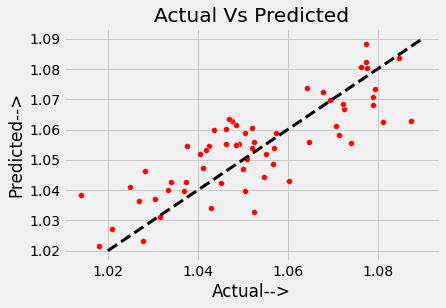

In [119]:
y_pred = linear.predict(X_test)
sns.scatterplot(y_test,y_pred, color='r')
plt.plot([1.02, 1.09], [1.02, 1.09], color = 'black',linestyle='--',linewidth=3)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Actual Vs Predicted")

# Predicting Body Fat Percentage

Many body composition equations derive their measure of percent body fat from first determining body density. Once body density is determined, percent bodyfat (%BF) can be calculated using the Siri equation below :

% Body Fat = (495 / Body Density) - 450


In [41]:
def predict(values):
    density = linear.predict(values)
    fat = ((4.95/density[0]) - 4.5)*100
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')
    

In [45]:
predict(X_test[26].reshape(1,-1))

Density: 1.0383050003839713 g/cc
Percentage Body Fat: 26.73853040960612 %

